This notebook is for analysing the 911 call data with pandas

The data source is form kaggle.com https://www.kaggle.com/mchirico/montcoalert

Columns description:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

# 1. importing the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Look at the data

In [4]:
calls = pd.read_csv('911.csv')

In [5]:
calls.shape

(99492, 9)

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
calls.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [8]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
# Top 5 zipcodes for 911 calls
calls['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
# Number of unique title
calls['title'].nunique()

110

In [11]:
# Number of unique Town
calls['twp'].nunique()

68

# 3. Creating new features

In [12]:
# Create a CallReason column
calls['CallReason'] = calls['title'].apply(lambda x: x.split(':')[0])

In [13]:
# Number of unique Reason
calls['CallReason'].nunique()

3

In [14]:
#Call Reason type
calls['CallReason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [15]:
#Number of Calls
calls['CallReason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: CallReason, dtype: int64

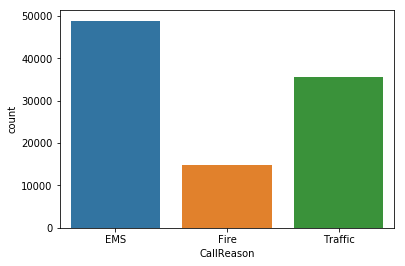

In [16]:
#Ploting Number of Calls
sns.countplot(calls['CallReason'])

In [17]:
#DataTime analysis
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

In [18]:
calls.dtypes

lat                  float64
lng                  float64
desc                  object
zip                  float64
title                 object
timeStamp     datetime64[ns]
twp                   object
addr                  object
e                      int64
CallReason            object
dtype: object

In [19]:
#Create Day_of_Week, Hour, Month columns

In [20]:
calls['Hour'] = calls['timeStamp'].apply(lambda t: t.hour)

In [21]:
calls['Month'] = calls['timeStamp'].apply(lambda t: t.month)

In [22]:
day_map = {0:'Mon', 1:'Tur', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
calls['Day_of_Week'] = calls['timeStamp'].apply(lambda t: t.dayofweek).map(day_map)

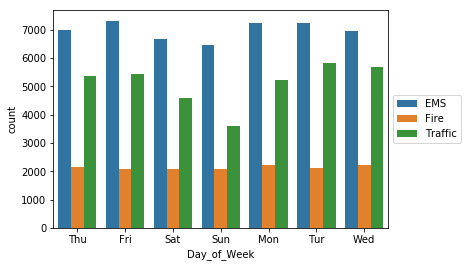

In [23]:
sns.countplot(x='Day_of_Week', data=calls, hue='CallReason')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

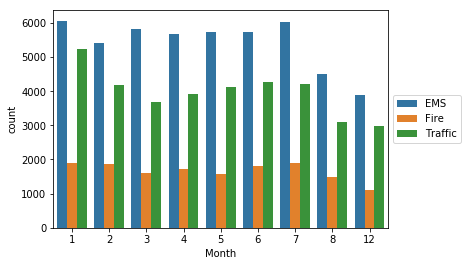

In [24]:
sns.countplot(x='Month', data=calls, hue='CallReason')
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.5))

In [25]:
#from the group above, there are missing months!

In [26]:
#Groupby Month
calls.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,CallReason,Hour,Day_of_Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


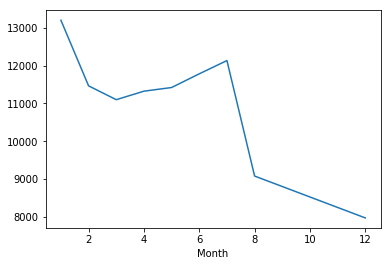

In [27]:
#total Calls in a year
calls.groupby('Month')['CallReason'].count().plot()

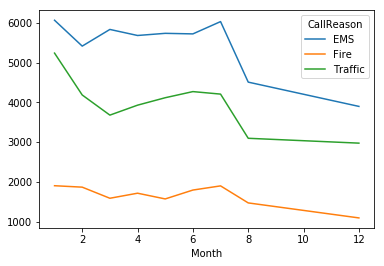

In [28]:
#CallReason comparison by month
calls.groupby(['Month','CallReason']).count().unstack()['e'].plot()

In [29]:
#linear fit on the number of calls per month
df = calls.groupby('Month').count().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


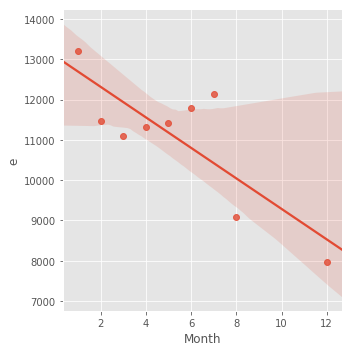

In [30]:
plt.style.use('ggplot')
sns.lmplot(x='Month', y='e', data=df)

In [31]:
#Create Date Column
calls['Date'] = calls['timeStamp'].apply(lambda t: t.date())

Text(0.5,1,'CallReason')

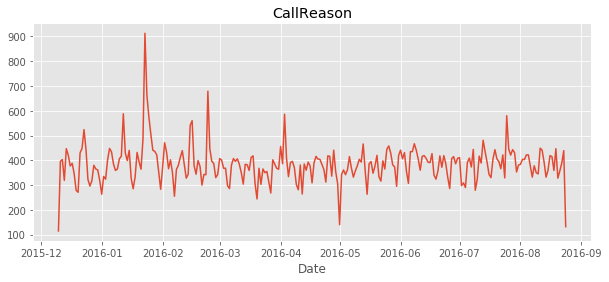

In [48]:
#Groupby Date
plt.figure(figsize=(10,4))
c = calls.groupby('Date')['CallReason'].count().plot()
c.set_title('CallReason')

In [55]:
#Traffic, Fire, EMS vs Date
callReason = calls.groupby(['Date', 'CallReason'])['e'].count().unstack()

Text(0.5,1,'Traffic')

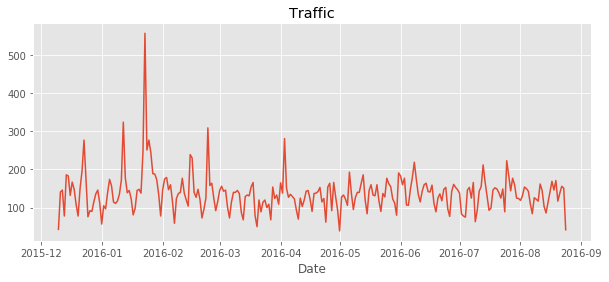

In [49]:
#Traffic vs Date
plt.figure(figsize=(10,4))
t = callReason['Traffic'].plot()
t.set_title('Traffic')

Text(0.5,1,'Fire')

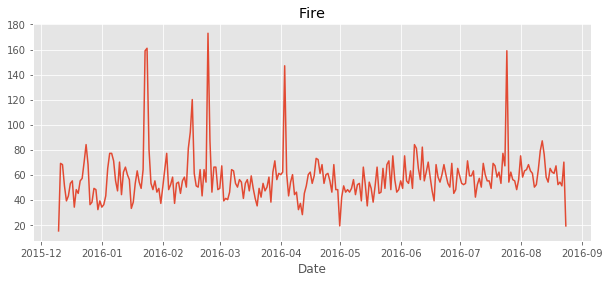

In [51]:
#Fire vs Date
plt.figure(figsize=(10,4))
f = callReason['Fire'].plot()
f.set_title('Fire')

Text(0.5,1,'EMS')

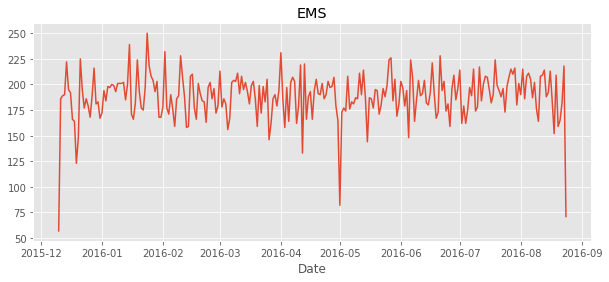

In [52]:
#EMS vs Date
plt.figure(figsize=(10,4))
e = callReason['EMS'].plot()
e.set_title('EMS')

In [64]:
df = calls.groupby(['Day_of_Week','Hour']).count()['e'].unstack()
df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tur,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


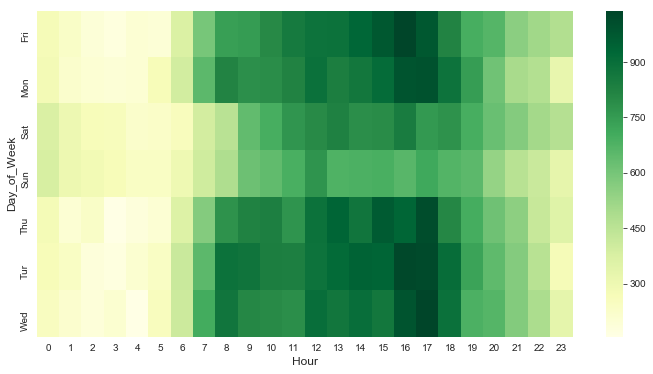

In [84]:
plt.figure(figsize=(12,6))
sns.heatmap(df, cmap='YlGn')

<Figure size 864x288 with 0 Axes>

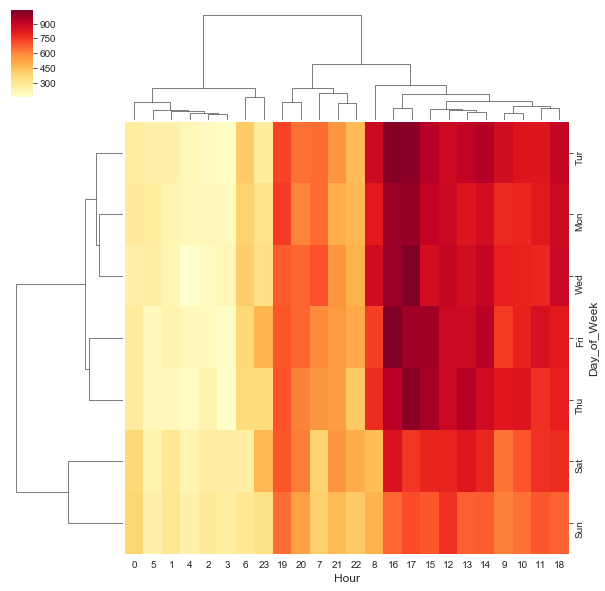

In [89]:
plt.figure(figsize=(12,4))
sns.clustermap(df, cmap='YlOrRd')

In [98]:
df2 = calls.groupby(['Month','Day_of_Week']).count()['e'].unstack(0)
df2

Month,1,2,3,4,5,6,7,8,12
Day_of_Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tur,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


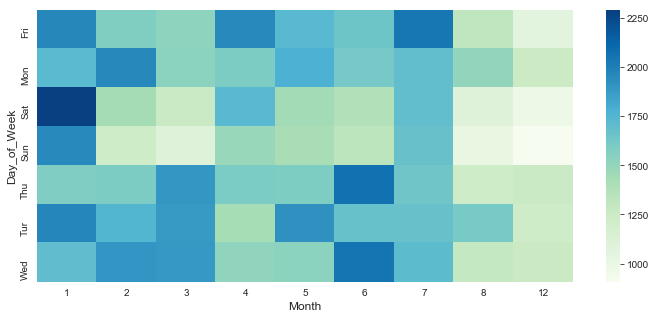

In [101]:
plt.figure(figsize=(12,5))
sns.heatmap(df2, cmap='GnBu')

<Figure size 864x360 with 0 Axes>

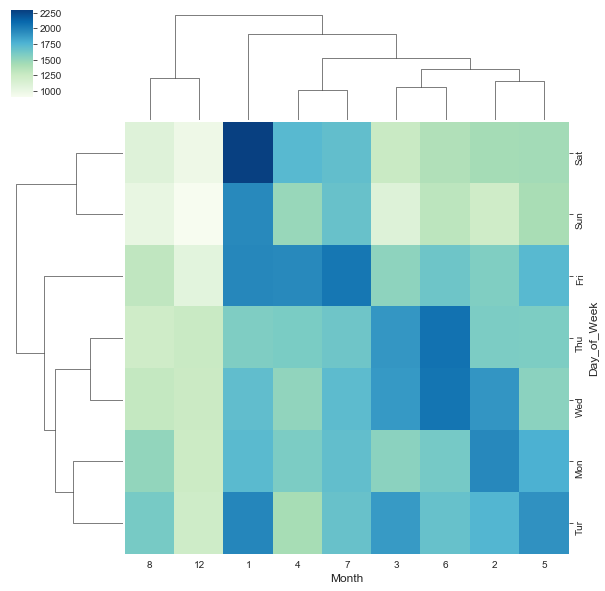

In [102]:
plt.figure(figsize=(12,5))
sns.clustermap(df2, cmap='GnBu')